In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
plt.style.use("fivethirtyeight")
%matplotlib inline

# For reading stock data from yahoo
from pandas_datareader.data import DataReader
from pandas_datareader import data as pdr


# For time stamps
from datetime import datetime


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Measles/benin.csv', parse_dates= True , index_col= "Year-Month")

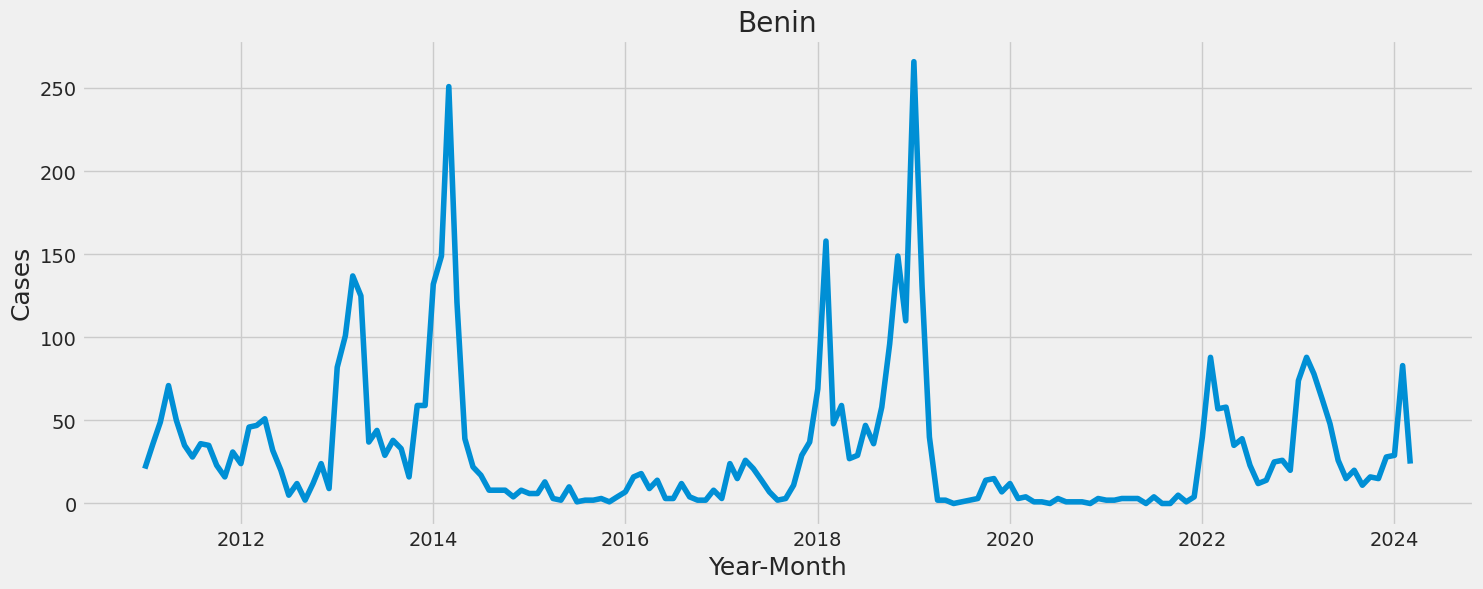

In [ ]:
plt.figure(figsize=(16,6))
plt.title('Benin')
plt.plot(df['Cases'])
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Cases', fontsize=18)
plt.show()

In [ ]:
# Create a new dataframe with only the 'Close column
data = df.filter(['Cases'])
# Convert the dataframe to a numpy array
dataset = data.values
# Get the number of rows to train the model on
training_data_len = int(np.ceil( len(dataset) * .92 ))

training_data_len

147

In [ ]:
# Scale the data
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.07894737],
       [0.13533835],
       [0.18421053],
       [0.26691729],
       [0.18796992],
       [0.13157895],
       [0.10526316],
       [0.13533835],
       [0.13157895],
       [0.08646617],
       [0.06015038],
       [0.11654135],
       [0.09022556],
       [0.17293233],
       [0.17669173],
       [0.19172932],
       [0.12030075],
       [0.07518797],
       [0.01879699],
       [0.04511278],
       [0.0075188 ],
       [0.04511278],
       [0.09022556],
       [0.03383459],
       [0.30827068],
       [0.37969925],
       [0.51503759],
       [0.46992481],
       [0.13909774],
       [0.16541353],
       [0.10902256],
       [0.14285714],
       [0.12406015],
       [0.06015038],
       [0.22180451],
       [0.22180451],
       [0.4962406 ],
       [0.56015038],
       [0.94360902],
       [0.45488722],
       [0.14661654],
       [0.08270677],
       [0.06390977],
       [0.03007519],
       [0.03007519],
       [0.03007519],
       [0.01503759],
       [0.030

In [ ]:
# Create the training data set
# Create the scaled training data set
train_data = scaled_data[0:int(training_data_len), :]
# Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i<= 31:
        print(x_train)
        print(y_train)
        print()

# Convert the x_train and y_train to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

# Reshape the data
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
# x_train.shape

[array([0.07894737, 0.13533835, 0.18421053, 0.26691729, 0.18796992,
       0.13157895, 0.10526316, 0.13533835, 0.13157895, 0.08646617,
       0.06015038, 0.11654135, 0.09022556, 0.17293233, 0.17669173,
       0.19172932, 0.12030075, 0.07518797, 0.01879699, 0.04511278,
       0.0075188 , 0.04511278, 0.09022556, 0.03383459, 0.30827068,
       0.37969925, 0.51503759, 0.46992481, 0.13909774, 0.16541353])]
[0.10902255639097744]

[array([0.07894737, 0.13533835, 0.18421053, 0.26691729, 0.18796992,
       0.13157895, 0.10526316, 0.13533835, 0.13157895, 0.08646617,
       0.06015038, 0.11654135, 0.09022556, 0.17293233, 0.17669173,
       0.19172932, 0.12030075, 0.07518797, 0.01879699, 0.04511278,
       0.0075188 , 0.04511278, 0.09022556, 0.03383459, 0.30827068,
       0.37969925, 0.51503759, 0.46992481, 0.13909774, 0.16541353]), array([0.13533835, 0.18421053, 0.26691729, 0.18796992, 0.13157895,
       0.10526316, 0.13533835, 0.13157895, 0.08646617, 0.06015038,
       0.11654135, 0.09022556, 0.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout
from keras.optimizers import Adam
# Build the LSTM model
model = Sequential()
model.add(LSTM(128, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(Dropout(0.2))  # Adding dropout to prevent overfitting
model.add(LSTM(64, return_sequences=False))
model.add(Dense(25,activation='relu'))
#model.add(Dense(25))
model.add(Dense(1))
adam = Adam(learning_rate=0.001)
# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(x_train, y_train, batch_size=1, epochs=10, validation_split=0.2)
#model.fit(x_train, y_train, batch_size=8, epochs=10)

Epoch 1/10
93/93 [==============================] - 18s 108ms/step - loss: 0.0374 - val_loss: 0.0120
Epoch 2/10
93/93 [==============================] - 3s 28ms/step - loss: 0.0343 - val_loss: 0.0119
Epoch 3/10
93/93 [==============================] - 3s 29ms/step - loss: 0.0307 - val_loss: 0.0102
Epoch 4/10
93/93 [==============================] - 3s 29ms/step - loss: 0.0298 - val_loss: 0.0098
Epoch 5/10
93/93 [==============================] - 4s 47ms/step - loss: 0.0293 - val_loss: 0.0139
Epoch 6/10
93/93 [==============================] - 3s 28ms/step - loss: 0.0250 - val_loss: 0.0070
Epoch 7/10
93/93 [==============================] - 3s 28ms/step - loss: 0.0179 - val_loss: 0.0325
Epoch 8/10
93/93 [==============================] - 3s 28ms/step - loss: 0.0273 - val_loss: 0.0067
Epoch 9/10
93/93 [==============================] - 3s 31ms/step - loss: 0.0178 - val_loss: 0.0131
Epoch 10/10
93/93 [==============================] - 4s 45ms/step - loss: 0.0155 - val_loss: 0.0053


In [ ]:
# Create the testing data set
# Create a new array containing scaled values from index 1543 to 2002
test_data = scaled_data[training_data_len - 30: , :]
# Create the data sets x_test and y_test
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30:i, 0])

# Convert the data to a numpy array
x_test = np.array(x_test)

# Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))

# Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

# Get the root mean squared error (RMSE)
rmse = np.sqrt(np.mean(((predictions - y_test) ** 2)))
rmse

1/1 [==============================] - 1s 911ms/step


16.99626694687036

<ipython-input-10-485d2a41a9f8>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


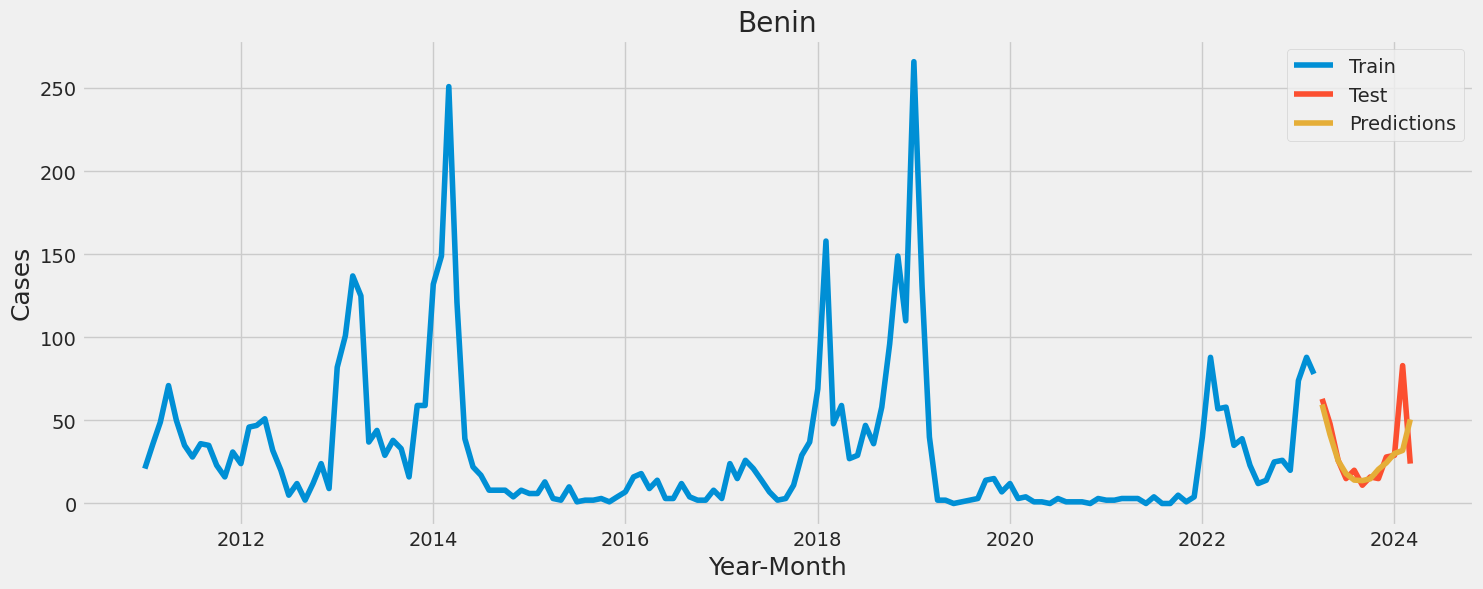

In [ ]:
# Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
# Visualize the data
plt.figure(figsize=(16,6))
plt.title('Benin')
plt.xlabel('Year-Month', fontsize=18)
plt.ylabel('Cases', fontsize=18)
plt.plot(train['Cases'])
plt.plot(valid[['Cases', 'Predictions']])
plt.legend(['Train', 'Test', 'Predictions'], loc='upper right')
plt.show()

In [ ]:
# Show the valid and predicted prices
valid

,Cases,Predictions
Year-Month,,
2023-04-01,63,59.608971
2023-05-01,48,41.524654
2023-06-01,26,25.757654
2023-07-01,15,17.951042
2023-08-01,20,14.095092
2023-09-01,11,13.772461
2023-10-01,16,14.871652
2023-11-01,15,20.542055
2023-12-01,28,24.467007


In [ ]:
predictions

array([[59.60897 ],
       [41.524654],
       [25.757654],
       [17.951042],
       [14.095092],
       [13.772461],
       [14.871652],
       [20.542055],
       [24.467007],
       [30.09593 ],
       [31.937906],
       [50.621758]], dtype=float32)

In [ ]:
valid["Cases"]

Year-Month
2023-04-01    63
2023-05-01    48
2023-06-01    26
2023-07-01    15
2023-08-01    20
2023-09-01    11
2023-10-01    16
2023-11-01    15
2023-12-01    28
2024-01-01    29
2024-02-01    83
2024-03-01    24
Name: Cases, dtype: int64

In [ ]:
from sklearn.metrics import mean_squared_error
error = np.sqrt(mean_squared_error(valid["Cases"],predictions))
print('Test RMSE: %.4f' % error)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(valid["Cases"],predictions)
print("Mean Absolute Error (MAE):", mae)

from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(valid["Cases"],predictions)
print("Mean Squared Logarithmic Error (MSLE):", msle)

from sklearn.metrics import mean_absolute_percentage_error
print('Mean Absolute Percentage Error (MAPE):',mean_absolute_percentage_error(valid["Cases"],predictions))

Test RMSE: 16.9963
Mean Absolute Error (MAE): 9.22669251759847
Mean Squared Logarithmic Error (MSLE): 0.14312591398133798
Mean Absolute Percentage Error (MAPE): 0.27254002758416546
